In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style='darkgrid',palette='rainbow')

In [270]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/main/Dimensionality%20Reduction/PCA.csv")

In [271]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


EDA

In [272]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [273]:
df.drop(columns=["Univ"],inplace=True)
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


# ***Standarize the data of transporce version of data***




In [274]:
from sklearn.preprocessing import StandardScaler

In [275]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [276]:
df.describe().T #T is used to transporce the data because pca treats rows as columns and columns as rows

,count,mean,std,min,25%,50%,75%,max
SAT,25.0,1266.44,108.359771,1005.0,1240.0,1285.0,1340.0,1415.0
Top10,25.0,76.48,19.433905,28.0,74.0,81.0,90.0,100.0
Accept,25.0,39.20,19.727308,14.0,24.0,36.0,50.0,90.0
SFRatio,25.0,12.72,4.067350,6.0,11.0,12.0,14.0,25.0
Expenses,25.0,27388.00,14424.883165,8704.0,15140.0,27553.0,34870.0,63575.0
GradRate,25.0,86.72,9.057778,67.0,81.0,90.0,94.0,97.0


Coveriance of transporce version os standerize data

In [277]:
coveriance  = np.cov(x.T)
coveriance

array([[ 1.04166667,  0.96096065, -0.92276   , -0.84640803,  0.81143331,
         0.77886664],
       [ 0.96096065,  1.04166667, -0.89498031, -0.67024493,  0.63694439,
         0.7770229 ],
       [-0.92276   , -0.89498031,  1.04166667,  0.6579829 , -0.5817078 ,
        -0.85369741],
       [-0.84640803, -0.67024493,  0.6579829 ,  1.04166667, -0.81441604,
        -0.58429345],
       [ 0.81143331,  0.63694439, -0.5817078 , -0.81441604,  1.04166667,
         0.40999107],
       [ 0.77886664,  0.7770229 , -0.85369741, -0.58429345,  0.40999107,
         1.04166667]])

Find eigen value and eigen vector

In [278]:
values,vectors = np.linalg.eig(coveriance)


In [279]:
values


array([4.80425527, 0.81960016, 0.02755274, 0.29850193, 0.17060428,
       0.12948562])

In [280]:
vectors

array([[-0.45774863, -0.03968044,  0.8580547 , -0.1870388 ,  0.13124033,
         0.02064583],
       [-0.42714437,  0.19993153, -0.39607492, -0.49780855,  0.37489567,
         0.4820162 ],
       [ 0.42430805, -0.32089297,  0.21693361,  0.15627899,  0.0612872 ,
         0.8010936 ],
       [ 0.39064831,  0.43256441,  0.1720479 , -0.60608085, -0.50739095,
         0.07682369],
       [-0.36252316, -0.6344864 , -0.17376309, -0.20474114, -0.62340055,
         0.07254775],
       [-0.37940403,  0.51555367, -0.00353754,  0.53247261, -0.43863341,
         0.33810965]])

# **PCA1**

In [281]:
vectors[:,0] #highest eigen values values associated to vectors 

array([-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
       -0.37940403])

In [282]:
pc1 = x@vectors[:,0]

PCA

In [283]:
from sklearn.decomposition import PCA


In [284]:
pca = PCA()

pcs = pd.DataFrame(pca.fit_transform(x))


In [285]:
pcs

,0,1,2,3,4,5
0,-1.009874,-1.064310,0.081066,0.056951,-0.128754,-0.034650
1,-2.822238,2.259045,0.836829,0.143845,-0.125962,-0.180703
2,1.112466,1.631209,-0.266787,1.075075,-0.191814,0.345679
3,-0.741741,-0.042187,0.060501,-0.157208,-0.577611,0.109163
4,-0.311912,-0.635244,0.010241,0.171364,0.012726,-0.016921
5,-1.696691,-0.344363,-0.253408,0.012564,-0.052661,-0.027166
6,-1.246821,-0.490984,-0.032094,-0.205644,0.293505,-0.078012
7,-0.338750,-0.785169,-0.493585,0.039856,-0.544979,-0.155372
8,-2.374150,-0.386539,0.116098,-0.453366,-0.230108,0.266984
9,-1.403277,2.119515,-0.442827,-0.632543,0.230054,-0.235615


In [286]:
pca.explained_variance_ratio_ #pc1 gives us 77% imformation pc1 and pc2 gives us 90% of imformation

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [287]:
np.cumsum(pca.explained_variance_ratio_)

array([0.76868084, 0.89981687, 0.94757718, 0.97487386, 0.99559156,
       1.        ])

Text(0.5, 1.0, 'Scree Plot')

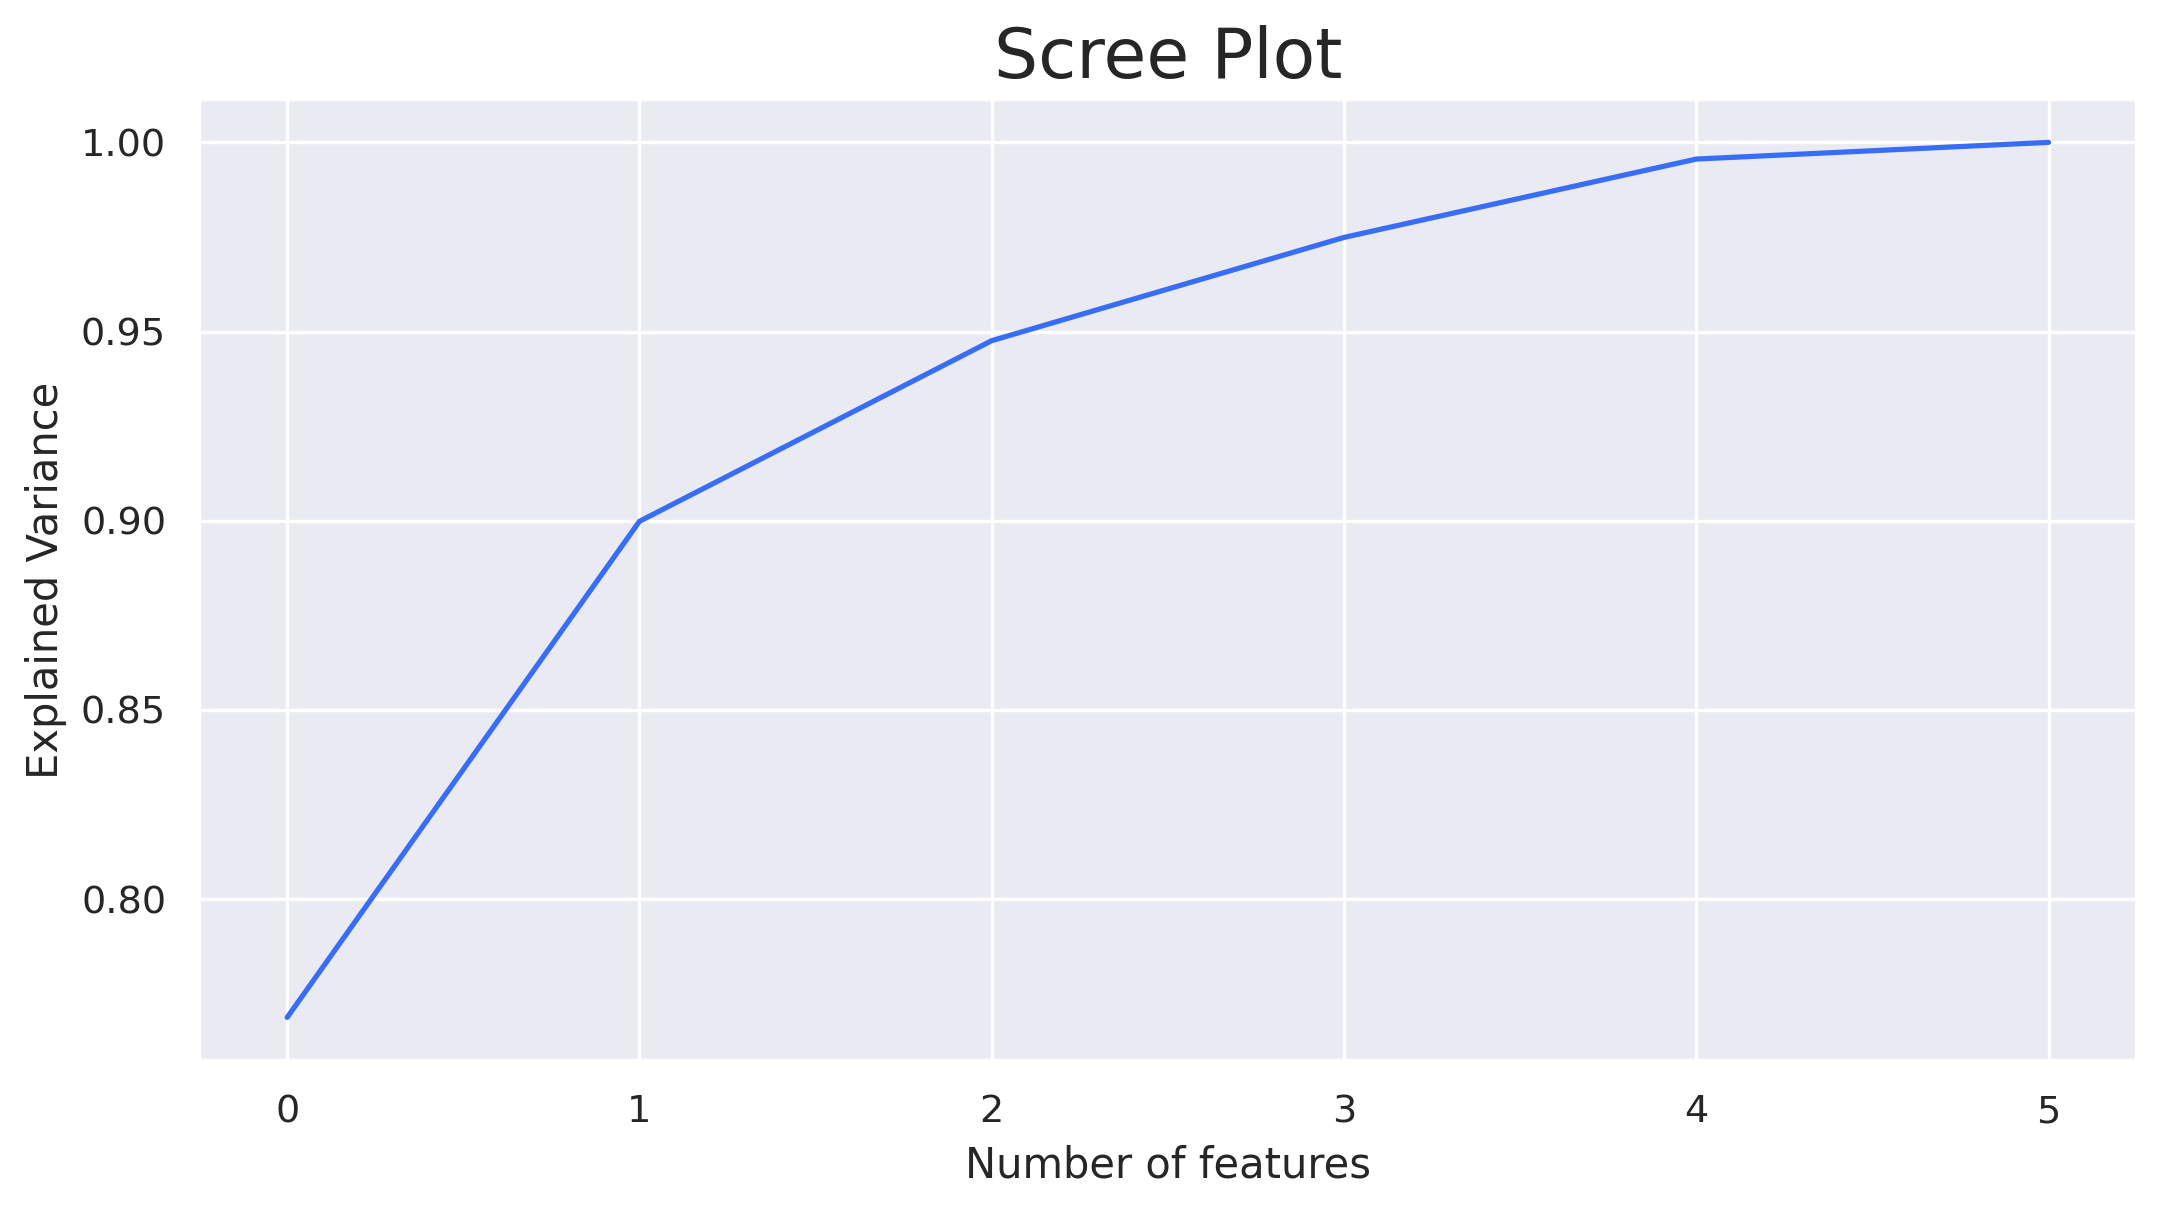

In [288]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)


In [289]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs = pd.DataFrame(pcs, columns=['pc1','pc2','pc3'])
pcs


,pc1,pc2,pc3
0,-1.009874,-1.064310,0.081066
1,-2.822238,2.259045,0.836829
2,1.112466,1.631209,-0.266787
3,-0.741741,-0.042187,0.060501
4,-0.311912,-0.635244,0.010241
5,-1.696691,-0.344363,-0.253408
6,-1.246821,-0.490984,-0.032094
7,-0.338750,-0.785169,-0.493585
8,-2.374150,-0.386539,0.116098
9,-1.403277,2.119515,-0.442827


# ***Perform logestic refression using pca ***

# pca is used in images and text data 

In [290]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [291]:
#load the data set
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


Train test split

In [292]:
x = df.iloc[:,:-1]
y = df["Customer_Segment"]

# ***MOdel building***

In [293]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=1)

In [294]:
#logestic regression

In [295]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)

In [296]:
print(classification_report(ytest,ypred)) #94% of accuracy

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



***PCA***

In [297]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [298]:
pca = PCA()
pcs = pca.fit_transform(x)


In [299]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [300]:
pca = PCA(n_components=7)
pcs = pd.DataFrame(pca.fit_transform(x))

In [301]:
pcs

,0,1,2,3,4,5,6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


In [302]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [303]:
xtrain,xtest,ytrain,ytest = train_test_split(pcs,y,test_size=0.2,random_state=1)


In [304]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [305]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

